In [17]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [18]:
mnist = load_digits()
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [19]:
images = mnist['images']
labels = mnist['target']

print(f'Image shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Image shape: (1797, 8, 8)
Labels shape: (1797,)


Image 5 has label 5


<Figure size 640x480 with 0 Axes>

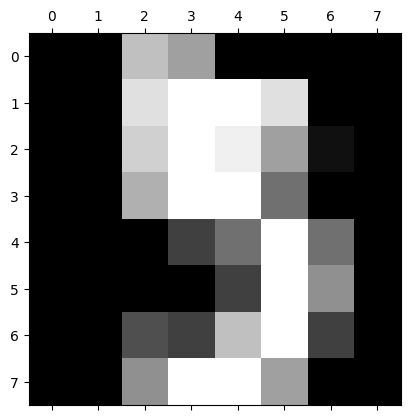

In [20]:
plt.gray()
i = 5
plt.matshow(images[i,:,:])
print(f'Image {i} has label {labels[i]}')

In [21]:
images_flat = images.reshape(1797, 64)


In [22]:
# 2. Dataprep the features such that it is between 0 and 1. (hint: this is quite easy as the maximum
# pixel illumination is 255)
# Column = feature, in this case a pixel

images_flat_dataprepped = images_flat/16

In [23]:
# 3. We are going to start by doing a binary classification. The model should predict if the number is
# 5 or not.
# Create a new variable y_train_is5, which are 0 for all y values except for when y is 5.

# Can check if each numpy array is the value

from sklearn.model_selection import train_test_split


# y_test_target = 5
y = (labels == 5).astype(int)

X = images_flat_dataprepped

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=420)



In [24]:
# 4. Create a logistic regression model, and train the data to predict if the image is a 5 or not. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression()

model_lr.fit(X=X_train,y=y_train)

y_prediction_test = model_lr.predict(X_test)
y_prediction_train = model_lr.predict(X_train)

# model_lr.predict_proba(X_test)

score_test = accuracy_score(y_true=y_test, y_pred=y_prediction_test)
score_train = accuracy_score(y_true=y_train, y_pred=y_prediction_train)

In [25]:
y_test_pred_naive = np.full(y_test.shape, 0)


In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1138,  119], dtype=int64))

In [27]:
score_naiv = accuracy_score(y_true=y_test, y_pred=y_test_pred_naive)

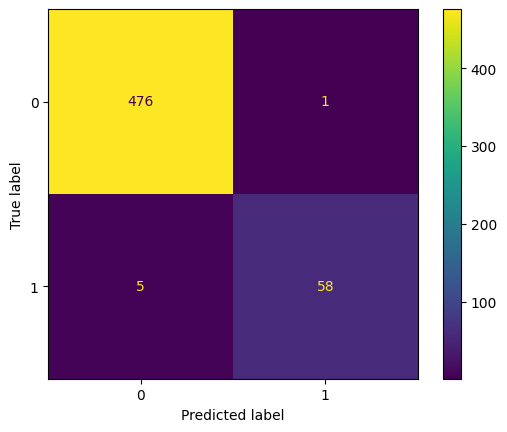

In [28]:
# 5. Investigate the confusion matrix, precision and recall. Is this good or bad?
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_prediction_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

Precicion_test = TP/(TP+FP)
Recall_test = TP/(TP+FN)


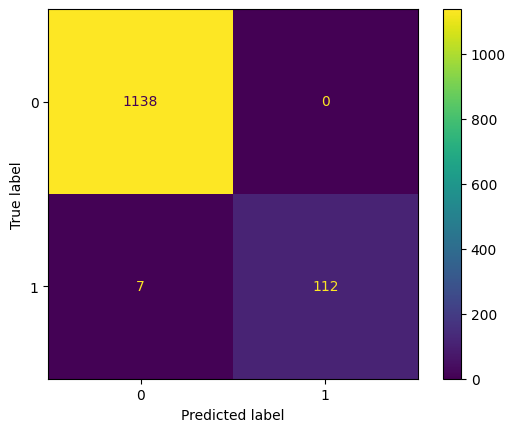

In [80]:
cm = confusion_matrix(y_train, y_prediction_train)
ConfusionMatrixDisplay(cm).plot()
plt.show()

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]



Precicion = TP/(TP+FP)
Recall = TP/(TP+FN)


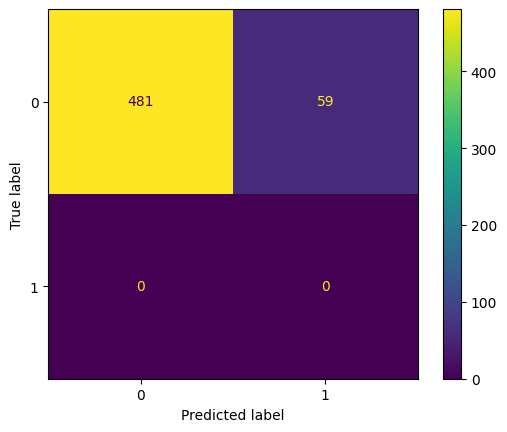

C:\Users\MariusDyrseth\AppData\Local\Temp\ipykernel_3800\1889144471.py:16: RuntimeWarning: invalid value encountered in scalar divide
  Recall_naive = TP/(TP+FN)


In [30]:
# 6. For comparison, only 1/10 instance will be a 5, so a very simple predictor could just predict false
# for every instance and will automatic be correct 9/10 times! Try doing this and compare this
# constant predictors confusion matrix, precision and recall to the values from the logistic
# regression.

#this makes a 2x2 grid
cm = confusion_matrix(y_test_pred_naive, y_prediction_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

Precicion_naive = TP/(TP+FP)
Recall_naive = TP/(TP+FN)


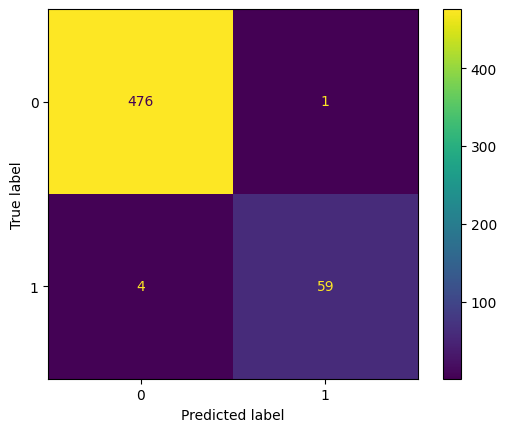

In [81]:
# 7. Using the logistic regression model, model.predict(image) only returns a class (0 or 1), if you
# instead use model.predict_proba(image) the model returns the probability of the class being
# true (prob(image is a 5)). Write code such that you can tune the threshold for what probabilities
# an instance should be set to 0 or 1. Again check how this threshold affect confusion matrix,
# precision and recall.

# • Choose prediction threshold
# • model.predict(X), gives a class
# • model.decision_function(X) gives a score
# • model.predict_proba(X) gives the probability 

# model_lr.predict(X)
prob_test = model_lr.predict_proba(X_test)[:,-1]
prob_test_rounded = np.round(prob_test,2)
# model_lr.decision_function(X_test)
#Round the values for easier percentage numbers
rounded_prob_test = np.round(prob_test, decimals=1)*100

threshold = 50

prob_test_threshold = (rounded_prob_test >= threshold).astype(int)

z_true_count = np.sum(prob_test_threshold)
z_false_count = len(prob_test_threshold) - z_true_count

cm = confusion_matrix(y_test, prob_test_threshold)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [87]:
# 8. If the price classifying a 5 wrong is 100kr while all other numbers is 5 kr. What threshold should
# be set for the logistic regressor to minimize cost?


# TP = cm[1][1] 0 kr
# FP = cm[0][1] -100 kr
# TN = cm[0][0] 0kr
# FN = cm[1][0] -5kr

error_cost = 0
best_model_dict = {}
# loops through the range, and adds it to 10 so testing 10,20 to 100

#lager 100 punkter mellom 0 og 1
# threshold = np.linspace(0,1,100)

for i in range(1,100):
    i_thresh = i
    
    prob_test_threshold = (rounded_prob_test >= i_thresh).astype(int)
    icm = confusion_matrix(y_test, prob_test_threshold)
    error_cost = ((icm[0][1])*100) + ((icm[1][0])*5)
    best_model_dict[i_thresh] = error_cost
    print(f" Error cost {error_cost} for: {i_thresh}")
    # ConfusionMatrixDisplay(icm).plot()
    # plt.show()



 Error cost 2200 for: 1
 Error cost 2200 for: 2
 Error cost 2200 for: 3
 Error cost 2200 for: 4
 Error cost 2200 for: 5
 Error cost 2200 for: 6
 Error cost 2200 for: 7
 Error cost 2200 for: 8
 Error cost 2200 for: 9
 Error cost 2200 for: 10
 Error cost 300 for: 11
 Error cost 300 for: 12
 Error cost 300 for: 13
 Error cost 300 for: 14
 Error cost 300 for: 15
 Error cost 300 for: 16
 Error cost 300 for: 17
 Error cost 300 for: 18
 Error cost 300 for: 19
 Error cost 300 for: 20
 Error cost 205 for: 21
 Error cost 205 for: 22
 Error cost 205 for: 23
 Error cost 205 for: 24
 Error cost 205 for: 25
 Error cost 205 for: 26
 Error cost 205 for: 27
 Error cost 205 for: 28
 Error cost 205 for: 29
 Error cost 205 for: 30
 Error cost 115 for: 31
 Error cost 115 for: 32
 Error cost 115 for: 33
 Error cost 115 for: 34
 Error cost 115 for: 35
 Error cost 115 for: 36
 Error cost 115 for: 37
 Error cost 115 for: 38
 Error cost 115 for: 39
 Error cost 115 for: 40
 Error cost 120 for: 41
 Error cost 120